In [47]:
import networkx as nx
from stochastic import *
import numpy as np

In [48]:
G = nx.Graph()
for i in range(20):
    G.add_node(i)
for i in range(20):
    G.add_edge(i, (i+1)%20)
    G.add_edge(i, (i+5)%20)

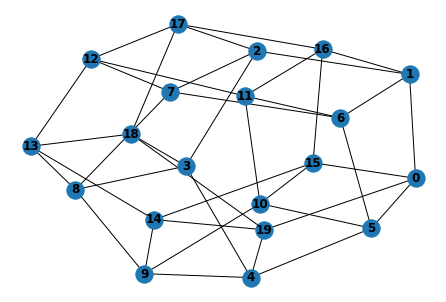

In [49]:
nx.draw(G, with_labels=True, font_weight='bold')

In [50]:
G1 = nx.Graph()
for i in range(20):
    G1.add_node(i)
for i in range(20):
    G1.add_edge(i, (i+3)%20)
    G1.add_edge(i, (i+6)%20)

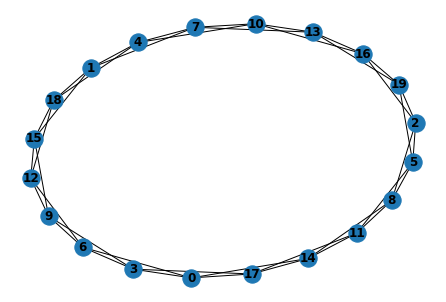

In [51]:
nx.draw(G1, with_labels=True, font_weight='bold')

In [52]:
sbm_P_true = np.eye(20);
G.remove_nodes_from(nx.isolates(G))
n = len(G)
l1 = nx.laplacian_matrix(G, range(n))
l1 = np.array(l1.todense())
G1.remove_nodes_from(nx.isolates(G1))
m = len(G1)
l2 = nx.laplacian_matrix(G1, range(m)) 
l2 = np.array(l2.todense())
sbm_G = np.double(l1)
sbm_G1 = np.double(l2)

[Epoch    1/600] loss: 1.893496 - std: 10.022490
[Epoch  100/600] loss: 1.335331 - std: 8.678001
[Epoch  200/600] loss: 1.016672 - std: 6.061933
[Epoch  300/600] loss: 0.831542 - std: 5.046855
[Epoch  400/600] loss: 0.684117 - std: 4.357987
[Epoch  500/600] loss: 0.595666 - std: 3.911042
[Epoch  600/600] loss: 0.577337 - std: 3.800017


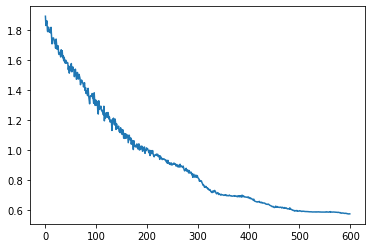

In [53]:
sbm_G_inv, sbm_G1_inv, sbm_P = find_permutation(sbm_G, sbm_G1, it=10, tau=2, n_samples=40, epochs=600, lr=0.5, 
                                               loss_type = 'w', alpha = 0.1, ones = True)

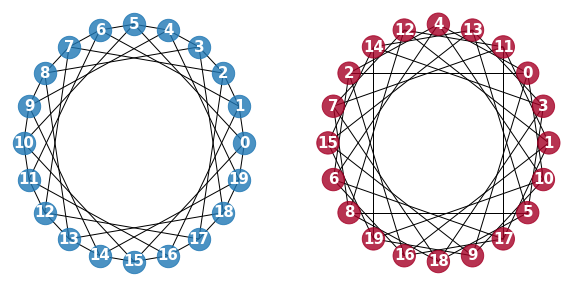

In [54]:
plot_graphs_ch(sbm_G, sbm_G1, sbm_P_true, sbm_P)

In [73]:
permutation = []
for i in range(sbm_P.shape[0]):
    for j in range(sbm_P.shape[1]):
        if sbm_P[i][j] == 1:
            permutation.append(j)
print(permutation)

[2, 0, 8, 1, 5, 18, 11, 9, 12, 16, 19, 3, 6, 4, 7, 10, 14, 17, 15, 13]


In [80]:
g = nx.adjacency_matrix(G).todense()
g1_init = nx.adjacency_matrix(G1).todense()[permutation, :]

In [94]:
diff = g - g1_init
np.linalg.norm(diff)

11.045361017187261